<img src='images/Practicum_AI_Logo.white_outline.svg' width=250 alt='Practicum AI logo'> <img src='https://github.com/PracticumAI/practicumai.github.io/blob/main/images/icons/practicumai_beginner.png?raw=true' align='right' width=50>
***
# *Practicum AI:* Deep Learning - Binary Classifier

This exercise adapted from Baig et al. (2020) <i>The Deep Learning Workshop</i> from <a href="https://www.packtpub.com/product/the-deep-learning-workshop/9781839219856">Packt Publishers</a> (Exercise 2.02, page 62).

#### 1. Import libraries

Import the necessary libraries.  Note also the import of pandas to support basic data wrangling tasks, the confusion matrix and accuracy score functions from SciKit-Learn, and matplotlib to visualize the data.!

In [ ]:
import tensorflow as tf
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

%matplotlib inline

#### 2. Create a dataframe with data from the dataset

### <img src='images/tip_icon.svg' alt="Tip icon" width=40 align=center> Tip

> If running on Google Colab, change the code to: <br>
    <code>df = pd.read_csv('https://raw.githubusercontent.com/PracticumAI/deep_learning/main/data/02.2_data.csv') </code>

In [3]:
df = pd.read_csv('data/02.2_data.csv')

#### 3. Examine the last 5 rows
Use the `tail()` method to examine the last 5 rows.

In [11]:
df.tail()

,label,x1,x2
16,0,7.3641,5.9868
17,0,6.2592,4.6711
18,0,8.3703,7.5810
19,0,8.5676,4.6457
20,0,8.1676,4.6457


#### 4. Visualize the data
After plotting the data, we see two distinct classes.  
- Data points labelled 0 are shown as stars
- Data points labelled 1 are shown as triangles 

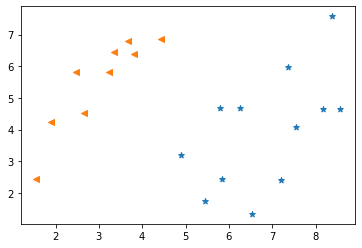

In [12]:
plt.scatter(df[df['label'] == 0]['x1'], \
            df[df['label'] == 0]['x2'], \
            marker = '*')

plt.scatter(df[df['label'] == 1]['x1'], \
            df[df['label'] == 1]['x2'], \
            marker = '<')

#### 5. Define variables for the features and labels
Prepare the data for the model, with X_input containing the features and y_label the corresponding labels for each feature. 

In [13]:
X_input = df[['x1','x2']].values
y_label = df[['label']].values

#### 6. Create tensorflow variables for features and labels
Now create tensorflow variables by typecasting X_input and y_label to floats.

In [14]:
x = tf.Variable(X_input, dtype = tf.float32)
y = tf.Variable(y_label, dtype = tf.float32)

#### 7. Define the perceptron and train it
This supporting code is similar to what you already saw in the 02.1_perceptron exercise.

In [ ]:
# Code it!


**Solution**

Click on the '...' below to show the solution.

In [16]:
# Constants
Number_of_features = 2
Number_of_units = 1
learning_rate = 0.01

# Weights and bias
weight = tf.Variable(tf.zeros([Number_of_features, \
                               Number_of_units]))
bias = tf.Variable(tf.zeros([Number_of_units]))

# Optimizer
optimizer = tf.optimizers.SGD(learning_rate)


In [ ]:
# Code it! (The perceptron and train functions)


**Solution**

Click on the '...' below to show the solution.

In [ ]:
def perceptron(x):
    z = tf.add(tf.matmul(x,weight),bias)
    output = tf.sigmoid(z)
    return output

def train(i):
    for n in range(i):
        loss = lambda: abs(tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels = y, logits = perceptron(x))))
        optimizer.minimize(loss, [weight, bias])
 
# Train the perceptron
train(1000)

#### 8. Display weight and bias values
Verify that the perceptron has been trained by viewing its weights and bias.

In [17]:
tf.print(weight, bias)

[[0]
 [0]] [0]


#### 9. Test the perceptron
Pass some input data to the perceptron to see if it classifies it correctly.

In [20]:
ypred = perceptron(x)

#### 10. Round off the output

In [21]:
ypred = tf.round(ypred)

#### 11. Measure the accuracy
Measure the accuracy using the accuracy_score function.  Our trained perceptron is 100% accurate!

In [22]:
acc = accuracy_score(y.numpy(), ypred.numpy())
print(acc)

1.0


#### 12. Create a confusion matrix
Use the SciKit-Learn confusion matrix to get a birds-eye view of our perceptron's performance.

All the numbers are along the diagonal.  So, our trained perceptron has correctly classifed the 12 data points in class 0 as well as the 9 data points in class 1.  It has achieved 100% accuracy. 

In [23]:
cnf_matrix = confusion_matrix(y.numpy(), \
                              ypred.numpy())
print(cnf_matrix)

[[12  0]
 [ 0  9]]
